![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

## 1. Libraries

To start, let's load those libraries that we need

In [1]:
from tensorflow import keras as ks
from matplotlib import pyplot as plt
import numpy as np
import time
import datetime

## 2. Model network architecture

In [2]:
model = ks.Sequential()

model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu', 
                           padding='same', input_shape=(32,32,3)))
model.add(ks.layers.MaxPooling2D((2, 2)))

model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(32, activation='relu'))
model.add(ks.layers.Dense(10, activation='softmax'))


To review a model, we just have to call the **.Summary()** method of the model

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 32)                262176    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 263,402
Trainable params: 263,402
Non-trainable params: 0
__________________________________________________

## 3. Optimizer, error function


In [4]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 4. We prepare the data

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 28x28 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [5]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

170508288/170498071 [==============================] - 3s 0us/step


In [6]:
y_train_label = y_train


We obtain an array with all the labels of CIFAR10

In [7]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Let's paint a sample of the images from the CIFAR10 dataset, to see if it looks anything like what we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **. Get_cmap ()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


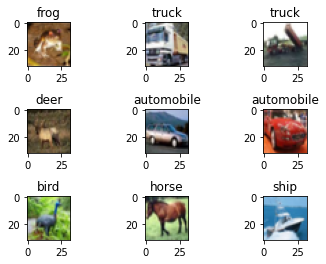

In [8]:
# Lets paint a sample of the images of MNIST

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

We are we going to want to validate while we train (very practical)

In [9]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [10]:
x_train[0].shape

(32, 32, 3)

When we add convolutions, we need to "pre-treat the data", because **the convolution expects an array of 4 fields** (more like "images"), in the case of MNIST. CIFAR10 already has the right shape, so we don't have to do anything, but as we always say: you better check its size.

Therefore, when exiting the Convolution, you have to do a Flatten, because FullDense layers expect arrays, not matrices !!

Then we print it to see that everything is correct

In [11]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


## 5. Training

We can start training the model! Be careful, we have to train against the data converted to the format expected by the Convolution.

We will start with 30 epocs, that is, 30 complete passes of the dataset (which in turn will be with mini-batches internally), setting a batch of 64

The .fit() method also allows us to define if we have several CPUs, GPUs, and if we want to validate data at each end of epoch.

In [12]:
t = time.perf_counter()

In [13]:
history = model.fit(x_train, y_train, epochs=20, 
                    use_multiprocessing=False, batch_size= 64, 
                    validation_data=(x_val, y_val))

Epoch 1/20
625/625 [==============================] - 16s 7ms/step - loss: 1.5826 - accuracy: 0.4319 - val_loss: 1.3633 - val_accuracy: 0.5218
Epoch 2/20
625/625 [==============================] - 4s 6ms/step - loss: 1.2868 - accuracy: 0.5467 - val_loss: 1.2436 - val_accuracy: 0.5698
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 1.1751 - accuracy: 0.5883 - val_loss: 1.2063 - val_accuracy: 0.5810
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 1.0995 - accuracy: 0.6158 - val_loss: 1.1616 - val_accuracy: 0.5957
Epoch 5/20
625/625 [==============================] - 4s 6ms/step - loss: 1.0367 - accuracy: 0.6372 - val_loss: 1.0992 - val_accuracy: 0.6220
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 0.9848 - accuracy: 0.6578 - val_loss: 1.0964 - val_accuracy: 0.6166
Epoch 7/20
625/625 [==============================] - 4s 6ms/step - loss: 0.9418 - accuracy: 0.6744 - val_loss: 1.0877 - val_accuracy: 0.6272
Epoch

In [14]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:01:31.960189


## 6. We evaluate the results

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

In [15]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 64.230


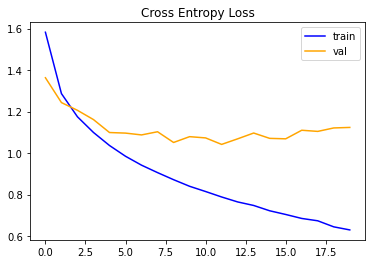

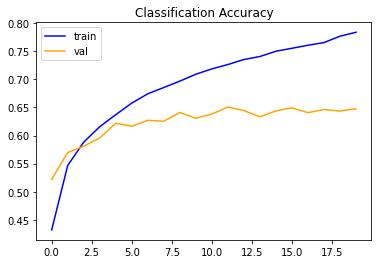

In [16]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

The cost we can see that it is stable and it is in the epoch 15 that it is set at a value. Also the accuracy dances around 0.10. It cannot be said that it is a very good model.

Let's see what kind of predictions I'm getting about the test set (let's paint the images and their classifications)

In [17]:
predictions = model.predict(x_test)

One of the advantages of Python is that there are loads of functions and code made by third parties. Here I have shot some nice functions (which I have adapted a bit to my needs) to be able to paint the images, their label (ground truth) and the classifications that we have made.

In [18]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

We draw the first images, with the predictions and their real values ​​(a total of 20 images, so as not to abuse your laptops)

We color the correct predictions in blue and the failures in red. Although I have printed the labels first so that we have a reference to the graphic.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


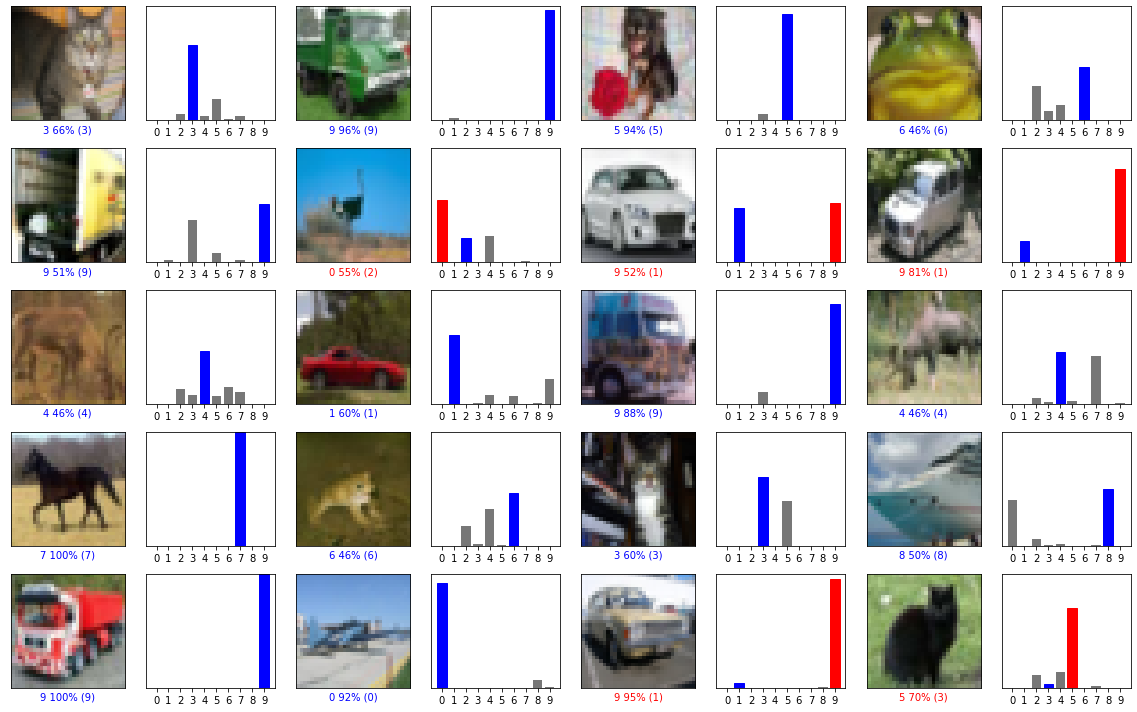

In [19]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## 7. We save the model for future evaluations

Go changing the names of the file to save the various projects.
Here we save it in "local", but remember that the ideal is that you save it in Google Drive (you have to mount the unit, set the path and save the .h5 model there)

In [20]:
model.save('cifar10_base_model.h5')